# Decision Tree Classification
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

## Load the dataset iris

In [2]:
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame({'Sepal length': iris.data[:,0], 'Sepal width': iris.data[:,1], 'Petal length':iris.data[:,2], 'Petal width':iris.data[:,3], 'Species':iris.target})
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df = df[df['Species'] !=0]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 50 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  100 non-null    float64
 1   Sepal width   100 non-null    float64
 2   Petal length  100 non-null    float64
 3   Petal width   100 non-null    float64
 4   Species       100 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 4.3 KB


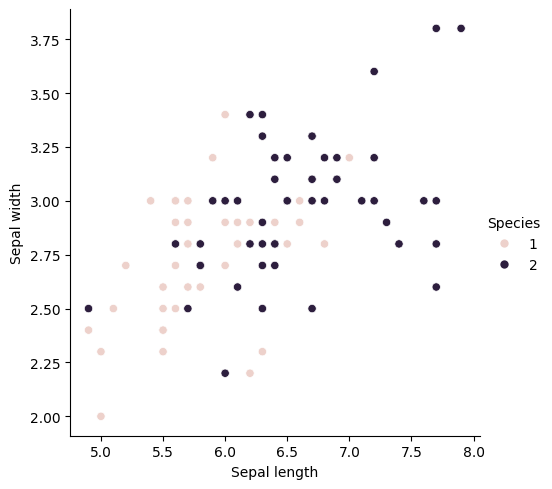

In [6]:
sns.relplot(data = df, x = 'Sepal length', y = 'Sepal width', hue = 'Species')

## Train-test split
training and testing dataset are splited with test_size as ratio.
Here we use 80% for training and 20% for testing

In [7]:
from sklearn.model_selection import train_test_split

X = df[df.columns[:4]]
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [8]:
X_train

,Sepal length,Sepal width,Petal length,Petal width
136,6.3,3.4,5.6,2.4
90,5.5,2.6,4.4,1.2
99,5.7,2.8,4.1,1.3
93,5.0,2.3,3.3,1.0
117,7.7,3.8,6.7,2.2
...,...,...,...,...
104,6.5,3.0,5.8,2.2
92,5.8,2.6,4.0,1.2
53,5.5,2.3,4.0,1.3
106,4.9,2.5,4.5,1.7


## Train your model

In [9]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

## Evaluate your model

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test,y_pred))

[[ 9  1]
 [ 0 10]]
Accuracy: 0.95


## Visualize the result

In [12]:
from sklearn import tree

text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_3 <= 1.75
|   |--- feature_2 <= 4.95
|   |   |--- feature_0 <= 4.95
|   |   |   |--- class: 2
|   |   |--- feature_0 >  4.95
|   |   |   |--- class: 1
|   |--- feature_2 >  4.95
|   |   |--- feature_3 <= 1.55
|   |   |   |--- class: 2
|   |   |--- feature_3 >  1.55
|   |   |   |--- feature_2 <= 5.45
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  5.45
|   |   |   |   |--- class: 2
|--- feature_3 >  1.75
|   |--- feature_2 <= 4.85
|   |   |--- feature_0 <= 5.95
|   |   |   |--- class: 1
|   |   |--- feature_0 >  5.95
|   |   |   |--- class: 2
|   |--- feature_2 >  4.85
|   |   |--- class: 2



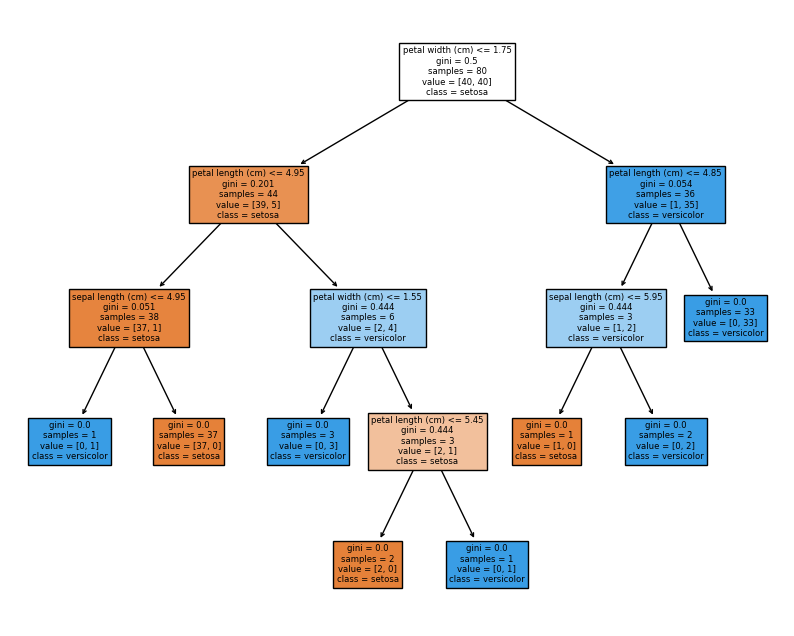

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
_ = tree.plot_tree(classifier, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

## Tune the model

Change hyperparameters, such as criterion, max_depth

[[ 9  1]
 [ 0 10]]
Accuracy: 0.95
|--- feature_3 <= 1.75
|   |--- feature_2 <= 4.95
|   |   |--- feature_0 <= 4.95
|   |   |   |--- class: 2
|   |   |--- feature_0 >  4.95
|   |   |   |--- class: 1
|   |--- feature_2 >  4.95
|   |   |--- feature_3 <= 1.55
|   |   |   |--- class: 2
|   |   |--- feature_3 >  1.55
|   |   |   |--- feature_2 <= 5.45
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  5.45
|   |   |   |   |--- class: 2
|--- feature_3 >  1.75
|   |--- feature_2 <= 4.85
|   |   |--- feature_0 <= 5.95
|   |   |   |--- class: 1
|   |   |--- feature_0 >  5.95
|   |   |   |--- class: 2
|   |--- feature_2 >  4.85
|   |   |--- class: 2



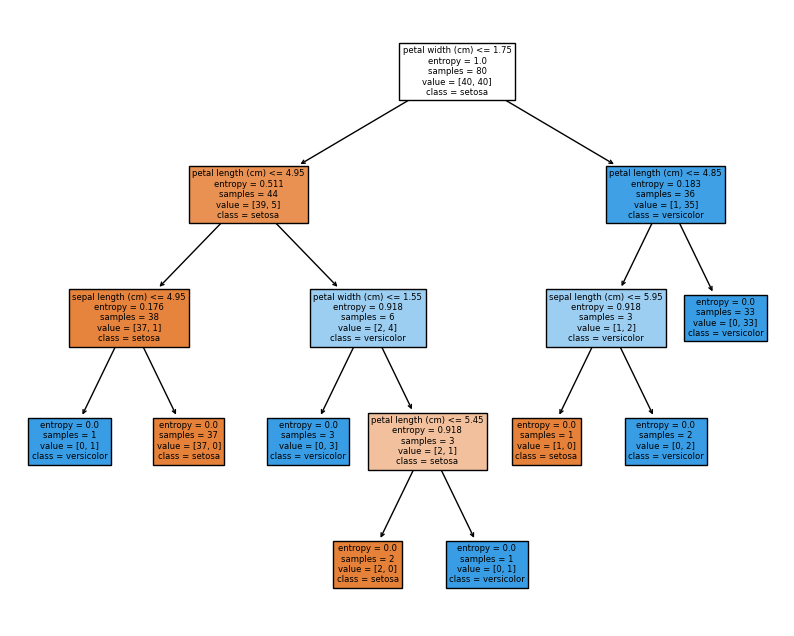

In [14]:
classifier = DecisionTreeClassifier(criterion= 'entropy')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test,y_pred))

text_representation = tree.export_text(classifier)
print(text_representation)

fig = plt.figure(figsize=(10,8))
_ = tree.plot_tree(classifier, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

[[ 9  1]
 [ 0 10]]
Accuracy: 0.95
|--- feature_2 <= 4.75
|   |--- class: 1
|--- feature_2 >  4.75
|   |--- class: 2



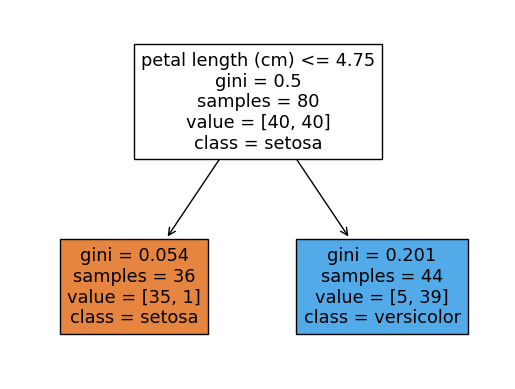

In [15]:
classifier = DecisionTreeClassifier(max_depth=1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test,y_pred))

text_representation = tree.export_text(classifier)
print(text_representation)

fig = plt.figure()
_ = tree.plot_tree(classifier, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

[[10  0]
 [ 0 10]]
Accuracy: 1.0
|--- feature_3 <= 1.75
|   |--- feature_2 <= 4.95
|   |   |--- class: 1
|   |--- feature_2 >  4.95
|   |   |--- class: 2
|--- feature_3 >  1.75
|   |--- feature_2 <= 4.85
|   |   |--- class: 2
|   |--- feature_2 >  4.85
|   |   |--- class: 2



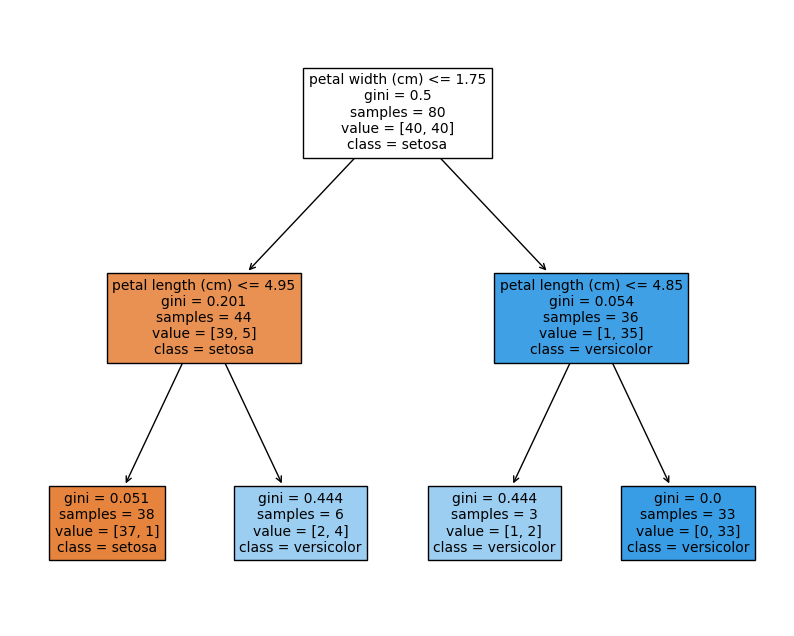

In [16]:
classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test,y_pred))

text_representation = tree.export_text(classifier)
print(text_representation)

fig = plt.figure(figsize=(10,8))
_ = tree.plot_tree(classifier, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [17]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test,y_pred))

text_representation = tree.export_text(classifier)
print(text_representation)

[[10  0]
 [ 0 10]]
Accuracy: 1.0
|--- feature_3 <= 1.75
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- class: 2
|   |--- feature_2 >  4.95
|   |   |--- feature_3 <= 1.55
|   |   |   |--- class: 2
|   |   |--- feature_3 >  1.55
|   |   |   |--- class: 1
|--- feature_3 >  1.75
|   |--- feature_2 <= 4.85
|   |   |--- feature_1 <= 3.10
|   |   |   |--- class: 2
|   |   |--- feature_1 >  3.10
|   |   |   |--- class: 1
|   |--- feature_2 >  4.85
|   |   |--- class: 2



In [18]:
def tree_depth_tuning(d):
  classifier = DecisionTreeClassifier(max_depth=d)
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [19]:
tree_results = pd.DataFrame({'D':np.arange(1, 10)})

In [20]:
tree_results['Accuracy'] = tree_results['D'].apply(tree_depth_tuning)
tree_results

,D,Accuracy
0,1,1.00
1,2,1.00
2,3,1.00
3,4,1.00
4,5,0.95
5,6,1.00
6,7,0.95
7,8,1.00
8,9,1.00
